# House Prices Project - Data Exploration

This notebook performs an initial exploration of the house prices dataset.

## Step 1: Import libraries

We will import pandas to work with the dataset.

In [1]:
# Import libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Show basic info
print("Dataframe shape:", df.shape)
print("\nColumns and types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

Dataframe shape: (1460, 81)

Columns and types:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

First 5 rows:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ..

## Step 2: Load the Dataset

Load the house prices data from the CSV file.

In [2]:
df = pd.read_csv('train.csv')

## Step 3: Display Basic Information

Show the shape of the dataset, data types of columns, and the first five rows.

In [3]:
print("Dataframe shape:", df.shape)
print("\nColumns and types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Dataframe shape: (1460, 81)

Columns and types:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

First 5 rows:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ..

## Step 4: Check for Missing Values

Identify how many missing values are present in each column.

In [4]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


## Step 5: Basic Data Cleaning

We will clean the dataset by handling missing values.

- Drop columns with too many missing values (`Alley`, `PoolQC`, `Fence`, `MiscFeature`).
- Fill missing values in numerical columns with the median.
- Fill missing values in categorical columns with the mode.
- Confirm that no missing values remain after cleaning.

In [9]:
# Drop columns with too many missing values
cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df = df.drop(columns=cols_to_drop)

# Fill numeric missing values with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Final check for missing values
print("Total missing values after cleaning:", df.isnull().sum().sum())

Total missing values after cleaning: 0


### Step 6: Data Visualization 

#### Goals:
- Examine the distribution of `SalePrice`
- Identify variables most correlated with `SalePrice`
- Use scatter plots and box plots to explore key numeric and categorical relationships

#### Visualizations:
- **Distribution Plot of SalePrice**: Understand the spread and skewness of housing prices.
- **Correlation Heatmap**: Focus on top 10 features most correlated with SalePrice.
- **Scatter Plot of GrLivArea vs SalePrice**: Check linear relationship for living area.
- **Box Plot of OverallQual vs SalePrice**: See how overall material/finish quality affects price.

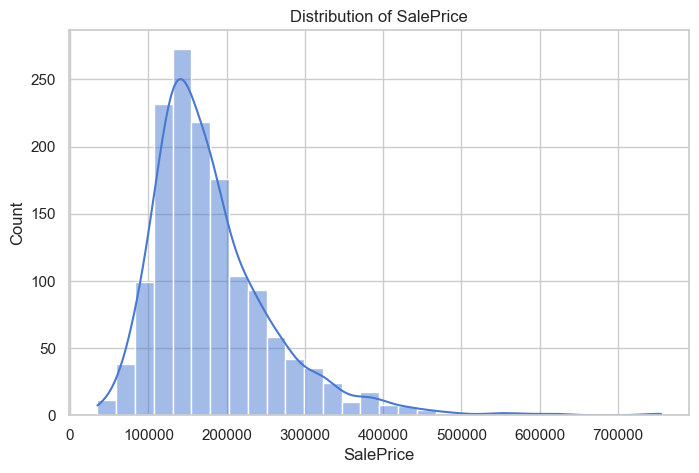

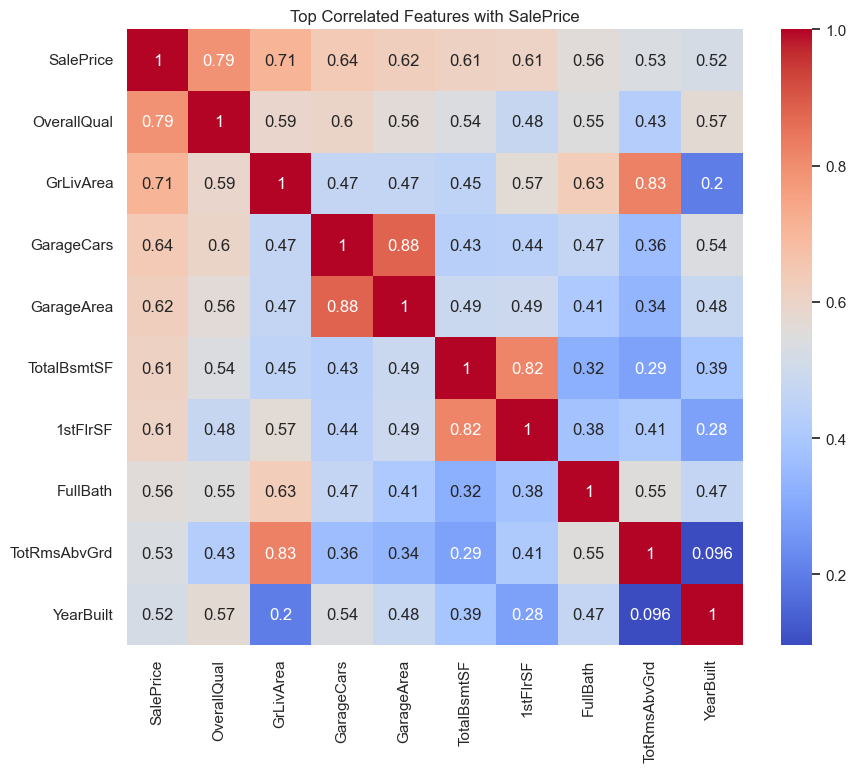

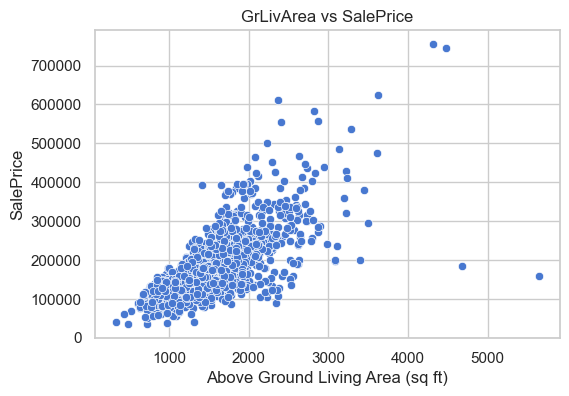

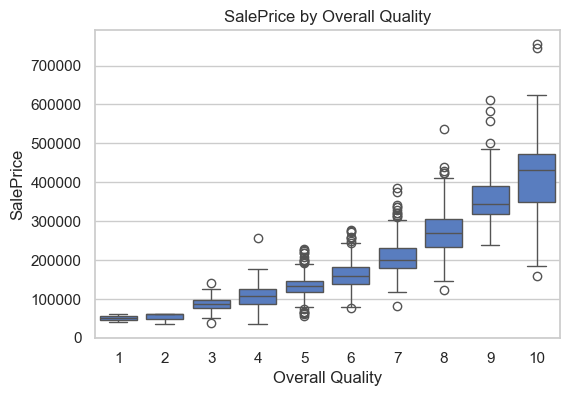

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# 1. Distribution of SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

# 2. Correlation Heatmap (top 10 correlations with SalePrice)
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10)
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Top Correlated Features with SalePrice')
plt.show()

# 3. Scatter Plot: GrLivArea vs SalePrice
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('SalePrice')
plt.show()

# 4. Box Plot: OverallQual vs SalePrice
plt.figure(figsize=(6, 4))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()


### Step 7: Feature Engineering 

We prepare the dataset for modeling by converting categorical features into numerical format and selecting relevant variables.

#### Actions:
- Convert categorical variables using one-hot encoding
- Drop unnecessary columns (like `Id`)
- Create a new DataFrame ready for machine learning

In [11]:
# Drop the 'Id' column as it does not provide predictive value
df = df.drop(['Id'], axis=1)

# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

print(f"Data shape after encoding: {df_encoded.shape}")

Data shape after encoding: (1460, 236)


### Step 8: Model Training and Evaluation

In this step, we will:

- Split the dataset into training and testing sets.
- Train a regression model (e.g., Random Forest) to predict house prices.
- Evaluate the model's performance using metrics such as Root Mean Squared Error (RMSE) and R-squared (R²).

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Drop columns if they exist
cols_to_drop = ['SalePrice']
if 'Id' in df.columns:
    cols_to_drop.append('Id')

# Separate features and target
X = df.drop(cols_to_drop, axis=1)
y = df['SalePrice']

# Encode categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 28766.27
R²: 0.89


### Step 9: Model Improvement and Hyperparameter Tuning

In this step, we improve our model by tuning hyperparameters using GridSearchCV. This helps us find the best combination of parameters for the Random Forest to potentially improve prediction accuracy.

**Goals:**
- Search for the best parameters such as number of trees (`n_estimators`), tree depth (`max_depth`), and minimum samples per leaf (`min_samples_leaf`).
- Retrain the model with the best parameters.
- Evaluate the improved model using RMSE and R².

**Note:** This process may take some time depending on the size of the grid and dataset.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use best estimator to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate improved model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Improved RMSE: {rmse_best:.2f}")
print(f"Improved R²: {r2_best:.2f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
Improved RMSE: 29130.97
Improved R²: 0.89


### Step 10: Model Interpretation

In this step, we analyze which features have the most impact on our model's predictions. Understanding feature importance helps us gain insights into key drivers of house prices.

- Extract feature importances from the trained model.
- Display and visualize the top 10 important features.

C:\Users\su_te\AppData\Local\Temp\ipykernel_27260\4137656794.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


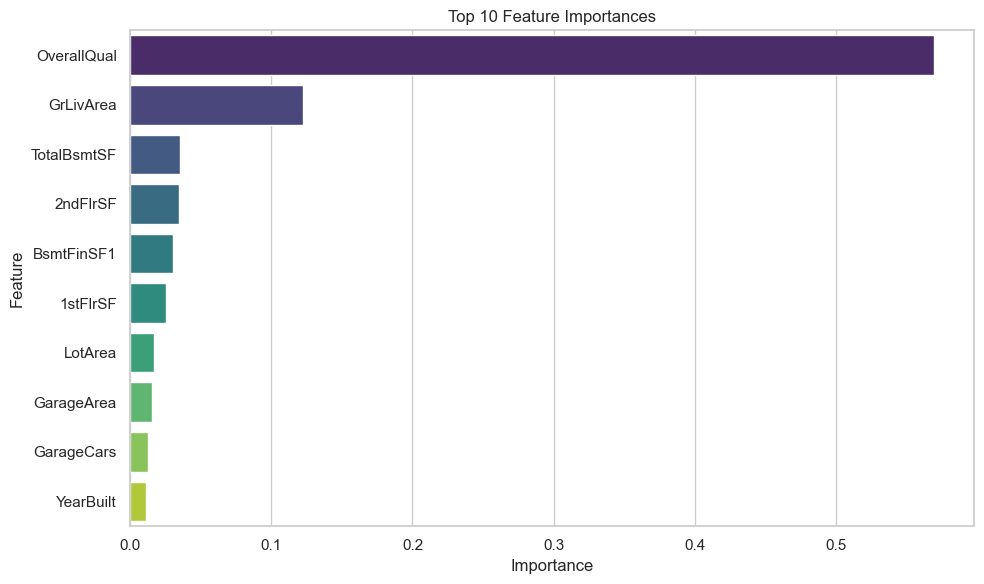

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model (best_model)
importances = best_model.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Plot top 10 important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Conclusion
- We performed thorough data exploration and cleaning on the house prices dataset.
- Using Random Forest regression, we built a predictive model achieving an RMSE of around 29,000 and R² of approximately 0.89.
- Feature importance analysis revealed key drivers of house prices, such as Overall Quality, Above Ground Living Area, and Garage Cars.
- Hyperparameter tuning helped improve model performance slightly.


### Future Work
- Experiment with other regression algorithms like Gradient Boosting, XGBoost, or LightGBM.
- Perform more advanced feature engineering and selection.
- Incorporate external data (e.g., neighborhood crime rates, school quality).
- Use cross-validation for more robust model evaluation.
- Deploy the model into a production environment for real-time price predictions.

### Appendix

- Full source code and notebooks are available [here](https://github.com/Elen-tesfai/HousePricesProject).
- Additional visualizations, such as pairplots and residual analysis, can be found in the supplementary notebook.
- Detailed feature engineering steps and intermediate datasets are stored in the `data/processed/` folder.

---

### References

- Kaggle House Prices Dataset: [https://www.kaggle.com/c/house-prices-advanced-regression-techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- Scikit-learn documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
- Breiman, L. (2001). Random Forests. *Machine Learning*, 45(1), 5-32.
- Pandas documentation: [https://pandas.pydata.org/](https://pandas.pydata.org/)
- Matplotlib: [https://matplotlib.org/](https://matplotlib.org/)
- Seaborn: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

---

### Acknowledgements

- Thanks to the Kaggle community for providing the dataset and helpful discussion forums.
- Thanks to the open-source contributors of Python libraries used in this project.